In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import statsmodels
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from typing import Type


In [2]:
df = pd.read_csv('PrepDataset.csv')

In [3]:
df.head()

,Unnamed: 0,ID_token,Seller_address,Buyer_address,Price_Crypto,Crypto,Price_USD,Collection,Market,Collection_cleaned,Category,Datetime_updated_minutes,Open,High,Low,Close,Volume,Transaction Volume,Average Price,Log Variance
0,0,87094722.0,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,0.0002,ETH,0.030318,Godsunchained,Godsunchained,Godsunchained,Games,2019-11-30 23:59:00,151.98,151.98,151.80,151.80,1.0,8.024007,0.617231,0.001185
1,1,73044643.0,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,0.0013,ETH,0.197067,Godsunchained,Godsunchained,Godsunchained,Games,2019-11-30 23:59:00,151.98,151.98,151.80,151.80,1.0,8.024007,0.617231,0.001185
2,2,17107482.0,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,0.0002,ETH,0.030318,Godsunchained,Godsunchained,Godsunchained,Games,2019-11-30 23:59:00,151.98,151.98,151.80,151.80,1.0,8.024007,0.617231,0.001185
3,3,82230857.0,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,0.0022,ETH,0.333498,Godsunchained,Godsunchained,Godsunchained,Games,2019-11-30 23:59:00,151.98,151.98,151.80,151.80,1.0,8.024007,0.617231,0.001185
4,4,40925443.0,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,0.0012,ETH,0.181908,Godsunchained,Godsunchained,Godsunchained,Games,2019-11-30 23:58:00,151.98,151.98,151.98,151.98,0.0,38.317541,2.947503,0.000000


In [4]:
df=df.loc[(df['Crypto']=='ETH') | (df['Crypto']=='WAX')]

In [5]:
 df=pd.get_dummies(df, prefix=['Crypto'], columns=['Crypto'])

In [6]:
 df=pd.get_dummies(df, prefix=['Category'], columns=['Category'])

In [7]:
 df=pd.get_dummies(df, prefix=['Market'], columns=['Market'])

In [8]:
df.loc[df['Buyer_address']=='0x0000000000000000000000000000000000000000', 'Private'] = 'Yes'

In [9]:
df['Private'] = df['Private'].fillna('No')

In [10]:
df=pd.get_dummies(df, prefix=['Private'], columns=['Private'])

In [11]:
dfDay=df.groupby(['Datetime_updated_minutes'],as_index=False).sum()

In [12]:
dfDay=dfDay[['Datetime_updated_minutes','Price_USD']]

In [13]:
df=df.merge(dfDay, how='left',on=['Datetime_updated_minutes'])

In [14]:
df.rename({'Price_USD_y': 'Volume_USD'}, axis=1, inplace=True)

In [15]:
df.rename({'Price_USD_x': 'Price_USD'}, axis=1, inplace=True)

In [16]:
df.loc[(df['Volume_USD']>1) & (df['Price_USD']<2600000)]

,Unnamed: 0,ID_token,Seller_address,Buyer_address,Price_Crypto,Price_USD,Collection,Collection_cleaned,Datetime_updated_minutes,Open,...,Category_Metaverse,Category_Other,Category_Utility,Market_Atomic,Market_Cryptokitties,Market_Godsunchained,Market_OpenSea,Private_No,Private_Yes,Volume_USD
0,0,8.709472e+07,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,0.0002,0.030318,Godsunchained,Godsunchained,2019-11-30 23:59:00,151.98,...,0,0,0,0,0,1,0,1,0,22.203803
1,1,7.304464e+07,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,0.0013,0.197067,Godsunchained,Godsunchained,2019-11-30 23:59:00,151.98,...,0,0,0,0,0,1,0,1,0,22.203803
2,2,1.710748e+07,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,0.0002,0.030318,Godsunchained,Godsunchained,2019-11-30 23:59:00,151.98,...,0,0,0,0,0,1,0,1,0,22.203803
3,3,8.223086e+07,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,0.0022,0.333498,Godsunchained,Godsunchained,2019-11-30 23:59:00,151.98,...,0,0,0,0,0,1,0,1,0,22.203803
4,4,4.092544e+07,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,0.0012,0.181908,Godsunchained,Godsunchained,2019-11-30 23:58:00,151.98,...,0,0,0,0,0,1,0,1,0,33.410436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5590164,6062739,1.641200e+04,0x9f37284b3a538be8eea2d401b595f44c96d39b70,0xa353401738e7ec6a4db9c0ee4c66eb5252f681c4,0.5000,967.707500,Superrare,Superrare,2021-04-01 00:00:00,1918.91,...,0,0,0,0,0,0,1,1,0,1495.156469
5590165,6062740,1.062274e+77,0xeada96bf164643bdfe3e657a9f380854694a49dd,0xe2fe53f9bcb33e3e0fc65f2f627ca4eb8e958347,0.0500,96.770750,Kawaii-monsters,Kawaiimonster,2021-04-01 00:00:00,1918.91,...,0,1,0,0,0,0,1,1,0,1495.156469
5590166,6062741,4.602588e+76,0x65c1b9ae4e4d8dcccfd3dc41b940840fe8570f2a,0x220d20310f52d97e353028ebd742d2c690eaf0a1,0.0185,35.805177,Moe-tokens,Moetoken,2021-04-01 00:00:00,1918.91,...,0,1,0,0,0,0,1,1,0,1495.156469
5590167,6062742,8.060875e+76,0xb236f00808a9f88b3117af95c881966288dfbcbb,0xd543a0be0684f0556786586b83f4c9fd16a4dc35,0.0100,19.354150,Not-fun-tokens,Notfuntoken,2021-04-01 00:00:00,1918.91,...,0,1,0,0,0,0,1,1,0,1495.156469


In [17]:
Countdf = df.groupby(['ID_token','Datetime_updated_minutes'],as_index=False).count()

In [18]:
Countdf=Countdf[['ID_token','Datetime_updated_minutes','Seller_address','Buyer_address']]

In [19]:
Countdf.rename({'Seller_address': 'Count_Seller','Buyer_address':'Count_Buyer'}, axis=1, inplace=True)

In [20]:
df=df.merge(Countdf, how='left', on=['ID_token','Datetime_updated_minutes'])

In [21]:
Playerdf = df.groupby(['Buyer_address'],as_index=False).count()

In [22]:
Playerdf = Playerdf[['Buyer_address','ID_token']]

In [23]:
Playerdf.rename({'ID_token':'Player_Buyer'}, axis=1, inplace=True)

In [24]:
df=df.merge(Playerdf, how='left', on=['Buyer_address'])

In [25]:
PlayerSellerdf = df.groupby(['Seller_address'],as_index=False).count()

In [26]:
PlayerSellerdf = PlayerSellerdf[['Seller_address','ID_token']]

In [27]:
PlayerSellerdf.rename({'ID_token':'Player_Seller'}, axis=1, inplace=True)

In [28]:
df=df.merge(PlayerSellerdf, how='left', on=['Seller_address'])

In [29]:
IDs=df['ID_token'].tolist()

In [30]:
Price=df['Price_USD'].tolist()

In [31]:
dic={}
Past_Price=[]
for i,a in zip(IDs,Price):
    if i in dic.keys():
        Past_Price.append(dic[i])
        dic[i]=a
    else:
        dic[i]=a
        Past_Price.append(0)

In [32]:
df['Past_Price']=Past_Price

In [33]:
df.columns

Index(['Unnamed: 0', 'ID_token', 'Seller_address', 'Buyer_address',
       'Price_Crypto', 'Price_USD', 'Collection', 'Collection_cleaned',
       'Datetime_updated_minutes', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Transaction Volume', 'Average Price', 'Log Variance', 'Crypto_ETH',
       'Crypto_WAX', 'Category_Art', 'Category_Collectible', 'Category_Games',
       'Category_Metaverse', 'Category_Other', 'Category_Utility',
       'Market_Atomic', 'Market_Cryptokitties', 'Market_Godsunchained',
       'Market_OpenSea', 'Private_No', 'Private_Yes', 'Volume_USD',
       'Count_Seller', 'Count_Buyer', 'Player_Buyer', 'Player_Seller',
       'Past_Price'],
      dtype='object')

In [34]:
df=df.fillna(0)

In [35]:
X=df[['Log Variance', 'Crypto_ETH',
       'Crypto_WAX', 'Category_Art', 'Category_Collectible', 'Category_Games',
       'Category_Metaverse', 'Category_Other', 'Category_Utility',
       'Market_Atomic', 'Market_Cryptokitties', 'Market_Godsunchained',
       'Market_OpenSea','Private_Yes', 'Volume_USD',
       'Count_Seller', 'Count_Buyer', 'Player_Buyer', 'Player_Seller','Past_Price']]

In [36]:
Y=df['Price_USD']

In [37]:
# Note the difference in argument order
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_USD   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                 3.459e+04
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        17:53:41   Log-Likelihood:            -5.5752e+07
No. Observations:             5590169   AIC:                         1.115e+08
Df Residuals:                 5590153   BIC:                         1.115e+08
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Log Variance          2.324e+04   1415.974     16.411      0.000    2.05e+04     2.6e+04
Crypto_ETH             177.0050      8.488     20.854      0.000     160.369     193.641
Crypto_WAX             -18.7542      5.229     -3.586      0.000     -29.004      -8.505
Category_Art           208.2840     10.775     19.330      0.000     187.165     229.403
Category_Collectible  -261.7149     10.304    -25.399      0.000    -281.910    -241.519
Category_Games        -222.9168     10.042    -22.199      0.000    -242.598    -203.236
Category_Metaverse     225.9135     26.281      8.596      0.000     174.403     277.424
Category_Other        -278.7597     12.937    -21.547      0.000    -304.116    -253.404
Category_Utility       487.4448     51.386      9.486      0.000     386.731     588.159
Market_Atomic          -18.7542      5.229     -3.586      0.000     -29.004      -8.505
Market_Cryptokitties  -305.6377      7.970    -38.349      0.000    -321.258    -290.017
Market_Godsunchained   344.4349     13.091     26.311      0.000     318.777     370.093
Market_OpenSea         138.2079      5.756     24.012      0.000     126.927     149.489
Private_Yes           4.364e+04    153.769    283.834      0.000    4.33e+04    4.39e+04
Volume_USD               0.0640      0.000    630.892      0.000       0.064       0.064
Count_Seller           -28.6839      1.410    -20.340      0.000     -31.448     -25.920
Count_Buyer            -28.6839      1.410    -20.340      0.000     -31.448     -25.920
Player_Buyer             0.0021      0.001      2.360      0.018       0.000       0.004
Player_Seller           -0.0016   8.34e-05    -19.011      0.000      -0.002      -0.001
Past_Price               0.0422      0.000     97.907      0.000       0.041       0.043
==================================================================================
Omnibus:                 40559518.570   Durbin-Watson:                       1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   330976557130550080.000
Skew:                         909.372   Prob(JB):                             0.00
Kurtosis:                 1192044.194   Cond. No.                         3.83e+18
==================================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.35e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [38]:
Xf=df[['Log Variance', 'Private_Yes','Player_Buyer', 'Volume_USD','Past_Price']]

In [39]:
# Note the difference in argument order
model2 = sm.OLS(Y, Xf).fit()
predictions2 = model2.predict(Xf) # make the predictions by the model

# Print out the statistics
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Price_USD   R-squared (uncentered):                   0.083
Model:                            OLS   Adj. R-squared (uncentered):              0.083
Method:                 Least Squares   F-statistic:                          1.014e+05
Date:                Sat, 07 May 2022   Prob (F-statistic):                        0.00
Time:                        17:53:53   Log-Likelihood:                     -5.5759e+07
No. Observations:             5590169   AIC:                                  1.115e+08
Df Residuals:                 5590164   BIC:                                  1.115e+08
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Log Variance -3.553e+04   1099.999    -32.297      0.000   -3.77e+04   -3.34e+04
Private_Yes   4.424e+04    153.849    287.557      0.000    4.39e+04    4.45e+04
Player_Buyer    -0.0175      0.001    -21.473      0.000      -0.019      -0.016
Volume_USD       0.0632      0.000    628.361      0.000       0.063       0.063
Past_Price       0.0434      0.000    100.607      0.000       0.043       0.044
==================================================================================
Omnibus:                 40548316.915   Durbin-Watson:                       1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   329829982859864832.000
Skew:                         908.313   Prob(JB):                             0.00
Kurtosis:                 1189977.657   Cond. No.                         1.10e+07
==================================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
df['date_day']=df['Datetime_updated_minutes'].str[:10]

In [41]:
df['date'] = pd.to_datetime(df['date_day'],infer_datetime_format=True)

In [42]:
dfDay=df.groupby(['ID_token','date', 'Seller_address', 'Buyer_address','Collection_cleaned'],as_index=False).mean()

In [43]:
Xday=dfDay[['Log Variance', 'Crypto_ETH',
       'Crypto_WAX', 'Category_Art', 'Category_Collectible', 'Category_Games',
       'Category_Metaverse', 'Category_Other', 'Category_Utility',
       'Market_Atomic', 'Market_Cryptokitties', 'Market_Godsunchained',
       'Market_OpenSea','Private_Yes', 'Volume_USD',
       'Count_Seller', 'Count_Buyer', 'Player_Buyer', 'Player_Seller','Past_Price']]

In [44]:
Yday=dfDay['Price_USD']

In [45]:
# Note the difference in argument order
modelDay = sm.OLS(Yday, Xday).fit()
predictionsDay = modelDay.predict(Xday) # make the predictions by the model

# Print out the statistics
modelDay.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_USD   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                 3.476e+04
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        18:01:08   Log-Likelihood:            -5.5503e+07
No. Observations:             5564491   AIC:                         1.110e+08
Df Residuals:                 5564475   BIC:                         1.110e+08
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Log Variance          2.382e+04   1420.989     16.760      0.000     2.1e+04    2.66e+04
Crypto_ETH             179.9940      8.587     20.962      0.000     163.165     196.823
Crypto_WAX             -19.4352      5.294     -3.671      0.000     -29.811      -9.059
Category_Art           212.4057     10.836     19.603      0.000     191.168     233.643
Category_Collectible  -263.6188     10.335    -25.507      0.000    -283.875    -243.363
Category_Games        -223.8633     10.073    -22.224      0.000    -243.606    -204.121
Category_Metaverse     220.5526     26.471      8.332      0.000     168.670     272.435
Category_Other        -267.0437     13.124    -20.348      0.000    -292.765    -241.322
Category_Utility       482.1263     51.464      9.368      0.000     381.259     582.993
Market_Atomic          -19.4352      5.294     -3.671      0.000     -29.811      -9.059
Market_Cryptokitties  -310.4225      8.011    -38.749      0.000    -326.124    -294.721
Market_Godsunchained   349.8824     13.119     26.669      0.000     324.169     375.596
Market_OpenSea         140.5341      5.785     24.292      0.000     129.195     151.873
Private_Yes            4.36e+04    153.985    283.131      0.000    4.33e+04    4.39e+04
Volume_USD               0.0647      0.000    633.363      0.000       0.065       0.065
Count_Seller           -29.9995      1.676    -17.903      0.000     -33.284     -26.715
Count_Buyer            -29.9995      1.676    -17.903      0.000     -33.284     -26.715
Player_Buyer             0.0022      0.001      2.414      0.016       0.000       0.004
Player_Seller           -0.0016   8.36e-05    -19.368      0.000      -0.002      -0.001
Past_Price               0.0420      0.000     97.183      0.000       0.041       0.043
==================================================================================
Omnibus:                 40353361.496   Durbin-Watson:                       1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   326731819912444608.000
Skew:                         907.490   Prob(JB):                             0.00
Kurtosis:                 1187105.192   Cond. No.                         8.77e+17
==================================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.4e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [46]:
XfDay=dfDay[['Log Variance', 'Private_Yes','Player_Buyer','Player_Seller', 'Volume_USD','Past_Price']]

In [47]:
# Note the difference in argument order
modelDay2 = sm.OLS(Yday, XfDay).fit()
predictionsDay2 = modelDay2.predict(XfDay) # make the predictions by the model

# Print out the statistics
modelDay2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Price_USD   R-squared (uncentered):                   0.084
Model:                            OLS   Adj. R-squared (uncentered):              0.084
Method:                 Least Squares   F-statistic:                          8.490e+04
Date:                Sat, 07 May 2022   Prob (F-statistic):                        0.00
Time:                        18:01:16   Log-Likelihood:                     -5.5511e+07
No. Observations:             5564491   AIC:                                  1.110e+08
Df Residuals:                 5564485   BIC:                                  1.110e+08
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Log Variance  -3.581e+04   1106.548    -32.358      0.000    -3.8e+04   -3.36e+04
Private_Yes     4.42e+04    154.066    286.903      0.000    4.39e+04    4.45e+04
Player_Buyer     -0.0172      0.001    -20.800      0.000      -0.019      -0.016
Player_Seller    -0.0002    5.1e-05     -4.323      0.000      -0.000      -0.000
Volume_USD        0.0640      0.000    630.623      0.000       0.064       0.064
Past_Price        0.0432      0.000     99.887      0.000       0.042       0.044
==================================================================================
Omnibus:                 40342241.014   Durbin-Watson:                       1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   325598878893509056.000
Skew:                         906.436   Prob(JB):                             0.00
Kurtosis:                 1185045.268   Cond. No.                         2.21e+07
==================================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
dfOnlyDay=df.groupby(['date'],as_index=False).mean()

In [49]:
XOnlyday=dfOnlyDay[['Log Variance', 'Crypto_ETH',
       'Crypto_WAX', 'Category_Art', 'Category_Collectible', 'Category_Games',
       'Category_Metaverse', 'Category_Other', 'Category_Utility',
       'Market_Atomic', 'Market_Cryptokitties', 'Market_Godsunchained',
       'Market_OpenSea','Private_Yes', 'Volume_USD',
       'Count_Seller', 'Count_Buyer', 'Player_Buyer', 'Player_Seller']]

In [50]:
YOnlyday=dfOnlyDay['Price_USD']

In [51]:
# Note the difference in argument order
modelOnlyDay = sm.OLS(YOnlyday, XOnlyday).fit()
predictionsOnlyDay = modelOnlyDay.predict(XOnlyday) # make the predictions by the model

# Print out the statistics
modelOnlyDay.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_USD   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     275.7
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        18:05:11   Log-Likelihood:                -6458.5
No. Observations:                1252   AIC:                         1.295e+04
Df Residuals:                    1237   BIC:                         1.302e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Log Variance          6376.5312   2176.358      2.930      0.003    2106.771    1.06e+04
Crypto_ETH             193.1705     32.046      6.028      0.000     130.299     256.042
Crypto_WAX             119.0635     21.720      5.482      0.000      76.451     161.676
Category_Art          -195.3628     34.952     -5.590      0.000    -263.934    -126.792
Category_Collectible  -121.8159     36.234     -3.362      0.001    -192.903     -50.728
Category_Games        -217.8624     34.814     -6.258      0.000    -286.164    -149.560
Category_Metaverse     112.8335     99.279      1.137      0.256     -81.939     307.607
Category_Other         120.4534     63.191      1.906      0.057      -3.520     244.426
Category_Utility       613.9882    205.456      2.988      0.003     210.907    1017.069
Market_Atomic          119.0635     21.720      5.482      0.000      76.451     161.676
Market_Cryptokitties    83.7724     16.255      5.154      0.000      51.882     115.663
Market_Godsunchained    52.5338     20.301      2.588      0.010      12.706      92.362
Market_OpenSea          56.8642     12.845      4.427      0.000      31.663      82.065
Private_Yes           6100.4224   1957.675      3.116      0.002    2259.692    9941.153
Volume_USD               0.0384      0.001     36.821      0.000       0.036       0.040
Count_Seller           -28.0578     17.131     -1.638      0.102     -61.667       5.551
Count_Buyer            -28.0578     17.131     -1.638      0.102     -61.667       5.551
Player_Buyer             0.0065      0.002      3.061      0.002       0.002       0.011
Player_Seller         4.466e-05      0.000      0.370      0.712      -0.000       0.000
==============================================================================
Omnibus:                      883.588   Durbin-Watson:                   0.786
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40242.485
Skew:                           2.711   Prob(JB):                         0.00
Kurtosis:                      30.240   Cond. No.                     1.80e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.48e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [80]:
XfOnlyDay=dfOnlyDay[['Log Variance','Category_Art','Category_Collectible', 'Category_Utility','Private_Yes', 'Volume_USD']]

In [81]:
# Note the difference in argument order
modelOnlyDay2 = sm.OLS(YOnlyday, XfOnlyDay).fit()
predictionsOnlyDay2 = modelOnlyDay2.predict(XfOnlyDay) # make the predictions by the model

# Print out the statistics
modelOnlyDay2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Price_USD   R-squared (uncentered):                   0.821
Model:                            OLS   Adj. R-squared (uncentered):              0.820
Method:                 Least Squares   F-statistic:                              949.4
Date:                Sat, 07 May 2022   Prob (F-statistic):                        0.00
Time:                        23:51:09   Log-Likelihood:                         -6487.1
No. Observations:                1252   AIC:                                  1.299e+04
Df Residuals:                    1246   BIC:                                  1.302e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Log Variance          5268.2623   1845.806      2.854      0.004    1647.031    8889.494
Category_Art            25.3530      1.948     13.017      0.000      21.532      29.174
Category_Collectible    98.9476      8.156     12.132      0.000      82.946     114.949
Category_Utility      1006.8559    213.597      4.714      0.000     587.806    1425.906
Private_Yes           9484.6489   1893.436      5.009      0.000    5769.973    1.32e+04
Volume_USD               0.0375      0.001     44.752      0.000       0.036       0.039
==============================================================================
Omnibus:                      876.894   Durbin-Watson:                   0.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39893.322
Skew:                           2.680   Prob(JB):                         0.00
Kurtosis:                      30.129   Cond. No.                     2.83e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

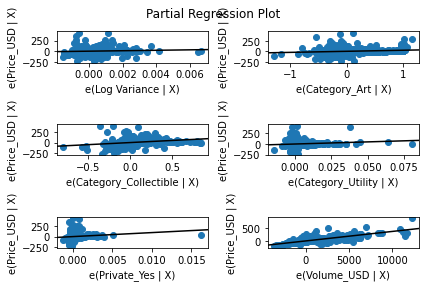

In [82]:
fig = sm.graphics.plot_partregress_grid(modelOnlyDay2)
fig.tight_layout(pad=1.0)

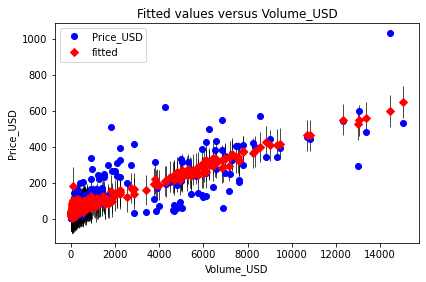

In [83]:
fig = sm.graphics.plot_fit(modelOnlyDay2,'Volume_USD')
fig.tight_layout(pad=1.0)

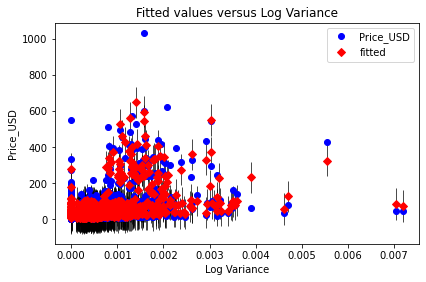

In [84]:
fig = sm.graphics.plot_fit(modelOnlyDay2,'Log Variance')
fig.tight_layout(pad=1.0)

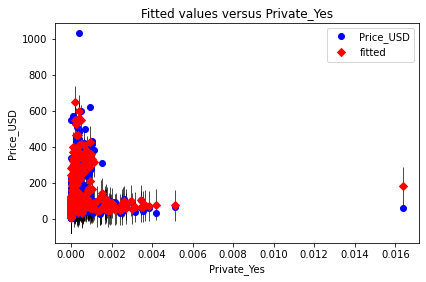

In [85]:
fig = sm.graphics.plot_fit(modelOnlyDay2,'Private_Yes')
fig.tight_layout(pad=1.0)

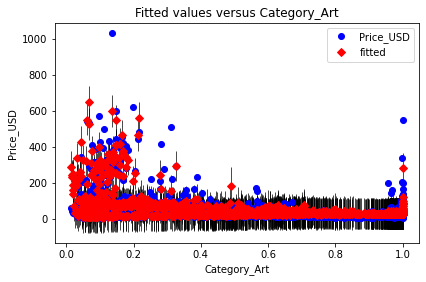

In [87]:
fig = sm.graphics.plot_fit(modelOnlyDay2,'Category_Art')
fig.tight_layout(pad=1.0)

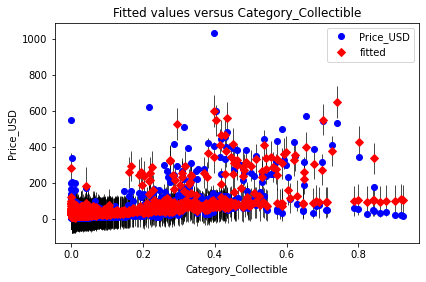

In [88]:
fig = sm.graphics.plot_fit(modelOnlyDay2,'Category_Collectible')
fig.tight_layout(pad=1.0)

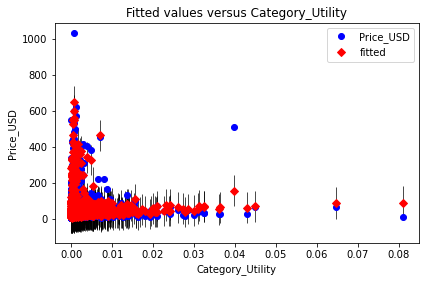

In [93]:
fig = sm.graphics.plot_fit(modelOnlyDay2,'Category_Utility')
fig.tight_layout(pad=1.0)

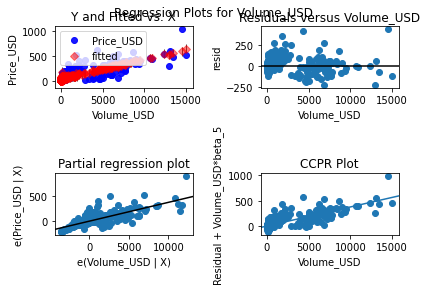

In [89]:
fig = sm.graphics.plot_regress_exog(modelOnlyDay2, 'Volume_USD')
fig.tight_layout(pad=1.0)

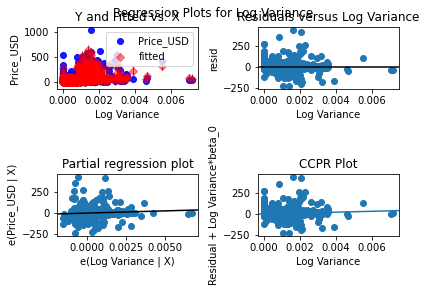

In [90]:
fig = sm.graphics.plot_regress_exog(modelOnlyDay2, 'Log Variance')
fig.tight_layout(pad=1.0)

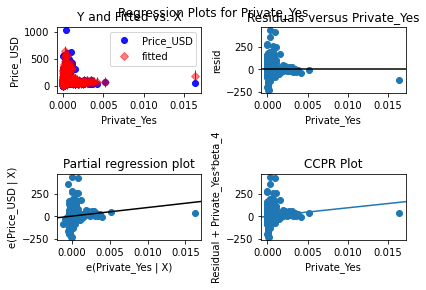

In [91]:
fig = sm.graphics.plot_regress_exog(modelOnlyDay2, 'Private_Yes')
fig.tight_layout(pad=1.0)

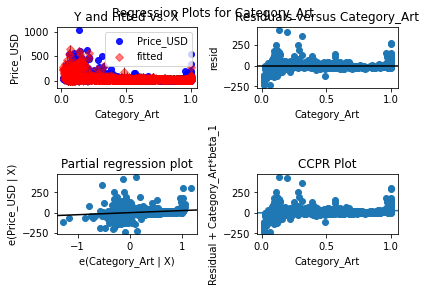

In [94]:
fig = sm.graphics.plot_regress_exog(modelOnlyDay2, 'Category_Art')
fig.tight_layout(pad=1.0)

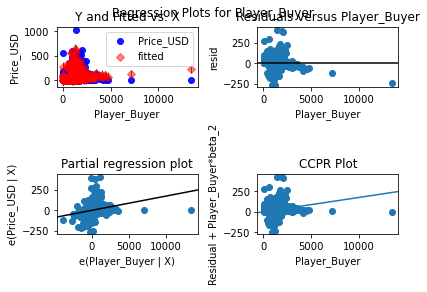

In [64]:
fig = sm.graphics.plot_regress_exog(modelOnlyDay2, 'Category_Collectible')
fig.tight_layout(pad=1.0)

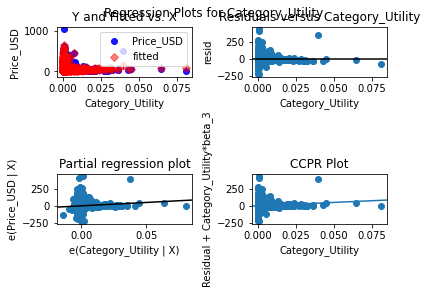

In [95]:
fig = sm.graphics.plot_regress_exog(modelOnlyDay2, 'Category_Utility')
fig.tight_layout(pad=1.0)

In [96]:
import numpy as np
import seaborn as sns
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from typing import Type

style_talk = 'seaborn-talk'    #refer to plt.style.available

class Linear_Reg_Diagnostic():
    """
    Diagnostic plots to identify potential problems in a linear regression fit.
    Mainly,
        a. non-linearity of data
        b. Correlation of error terms
        c. non-constant variance
        d. outliers
        e. high-leverage points
        f. collinearity

    Author:
        Prajwal Kafle (p33ajkafle@gmail.com, where 3 = r)
        Does not come with any sort of warranty.
        Please test the code one your end before using.
    """

    def __init__(self,
                 results: Type[statsmodels.regression.linear_model.RegressionResultsWrapper]) -> None:
        """
        For a linear regression model, generates following diagnostic plots:

        a. residual
        b. qq
        c. scale location and
        d. leverage

        and a table

        e. vif

        Args:
            results (Type[statsmodels.regression.linear_model.RegressionResultsWrapper]):
                must be instance of statsmodels.regression.linear_model object

        Raises:
            TypeError: if instance does not belong to above object

        Example:
        >>> import numpy as np
        >>> import pandas as pd
        >>> import statsmodels.formula.api as smf
        >>> x = np.linspace(-np.pi, np.pi, 100)
        >>> y = 3*x + 8 + np.random.normal(0,1, 100)
        >>> df = pd.DataFrame({'x':x, 'y':y})
        >>> res = smf.ols(formula= "y ~ x", data=df).fit()
        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls(plot_context="seaborn-paper")

        In case you do not need all plots you can also independently make an individual plot/table
        in following ways

        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls.residual_plot()
        >>> cls.qq_plot()
        >>> cls.scale_location_plot()
        >>> cls.leverage_plot()
        >>> cls.vif_table()
        """

        if isinstance(results, statsmodels.regression.linear_model.RegressionResultsWrapper) is False:
            raise TypeError("result must be instance of statsmodels.regression.linear_model.RegressionResultsWrapper object")

        self.results = maybe_unwrap_results(results)

        self.y_true = self.results.model.endog
        self.y_predict = self.results.fittedvalues
        self.xvar = self.results.model.exog
        self.xvar_names = self.results.model.exog_names

        self.residual = np.array(self.results.resid)
        influence = self.results.get_influence()
        self.residual_norm = influence.resid_studentized_internal
        self.leverage = influence.hat_matrix_diag
        self.cooks_distance = influence.cooks_distance[0]
        self.nparams = len(self.results.params)

    def __call__(self, plot_context='seaborn-paper'):
        # print(plt.style.available)
        with plt.style.context(plot_context):
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
            self.residual_plot(ax=ax[0,0])
            self.qq_plot(ax=ax[0,1])
            self.scale_location_plot(ax=ax[1,0])
            self.leverage_plot(ax=ax[1,1])
            plt.show()

        self.vif_table()
        return fig, ax


    def residual_plot(self, ax=None):
        """
        Residual vs Fitted Plot

        Graphical tool to identify non-linearity.
        (Roughly) Horizontal red line is an indicator that the residual has a linear pattern
        """
        if ax is None:
            fig, ax = plt.subplots()

        sns.residplot(
            x=self.y_predict,
            y=self.residual,
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        residual_abs = np.abs(self.residual)
        abs_resid = np.flip(np.sort(residual_abs))
        abs_resid_top_3 = abs_resid[:3]
        for i, _ in enumerate(abs_resid_top_3):
            ax.annotate(
                i,
                xy=(self.y_predict[i], self.residual[i]),
                color='C3')

        ax.set_title('Residuals vs Fitted', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('Residuals')
        return ax

    def qq_plot(self, ax=None):
        """
        Standarized Residual vs Theoretical Quantile plot

        Used to visually check if residuals are normally distributed.
        Points spread along the diagonal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        QQ = ProbPlot(self.residual_norm)
        QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)

        # annotations
        abs_norm_resid = np.flip(np.argsort(np.abs(self.residual_norm)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for r, i in enumerate(abs_norm_resid_top_3):
            ax.annotate(
                i,
                xy=(np.flip(QQ.theoretical_quantiles, 0)[r], self.residual_norm[i]),
                ha='right', color='C3')

        ax.set_title('Normal Q-Q', fontweight="bold")
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Standardized Residuals')
        return ax

    def scale_location_plot(self, ax=None):
        """
        Sqrt(Standarized Residual) vs Fitted values plot

        Used to check homoscedasticity of the residuals.
        Horizontal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        residual_norm_abs_sqrt = np.sqrt(np.abs(self.residual_norm))

        ax.scatter(self.y_predict, residual_norm_abs_sqrt, alpha=0.5);
        sns.regplot(
            x=self.y_predict,
            y=residual_norm_abs_sqrt,
            scatter=False, ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        abs_sq_norm_resid = np.flip(np.argsort(residual_norm_abs_sqrt), 0)
        abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
        for i in abs_sq_norm_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], residual_norm_abs_sqrt[i]),
                color='C3')
        ax.set_title('Scale-Location', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel(r'$\sqrt{|\mathrm{Standardized\ Residuals}|}$');
        return ax

    def leverage_plot(self, ax=None):
        """
        Residual vs Leverage plot

        Points falling outside Cook's distance curves are considered observation that can sway the fit
        aka are influential.
        Good to have none outside the curves.
        """
        if ax is None:
            fig, ax = plt.subplots()

        ax.scatter(
            self.leverage,
            self.residual_norm,
            alpha=0.5);

        sns.regplot(
            x=self.leverage,
            y=self.residual_norm,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        leverage_top_3 = np.flip(np.argsort(self.cooks_distance), 0)[:3]
        for i in leverage_top_3:
            ax.annotate(
                i,
                xy=(self.leverage[i], self.residual_norm[i]),
                color = 'C3')

        xtemp, ytemp = self.__cooks_dist_line(0.5) # 0.5 line
        ax.plot(xtemp, ytemp, label="Cook's distance", lw=1, ls='--', color='red')
        xtemp, ytemp = self.__cooks_dist_line(1) # 1 line
        ax.plot(xtemp, ytemp, lw=1, ls='--', color='red')

        ax.set_xlim(0, max(self.leverage)+0.01)
        ax.set_title('Residuals vs Leverage', fontweight="bold")
        ax.set_xlabel('Leverage')
        ax.set_ylabel('Standardized Residuals')
        ax.legend(loc='upper right')
        return ax

    def vif_table(self):
        """
        VIF table

        VIF, the variance inflation factor, is a measure of multicollinearity.
        VIF > 5 for a variable indicates that it is highly collinear with the
        other input variables.
        """
        vif_df = pd.DataFrame()
        vif_df["Features"] = self.xvar_names
        vif_df["VIF Factor"] = [variance_inflation_factor(self.xvar, i) for i in range(self.xvar.shape[1])]

        print(vif_df
                .sort_values("VIF Factor")
                .round(2))


    def __cooks_dist_line(self, factor):
        """
        Helper function for plotting Cook's distance curves
        """
        p = self.nparams
        formula = lambda x: np.sqrt((factor * p * (1 - x)) / x)
        x = np.linspace(0.001, max(self.leverage), 50)
        y = formula(x)
        return x, y

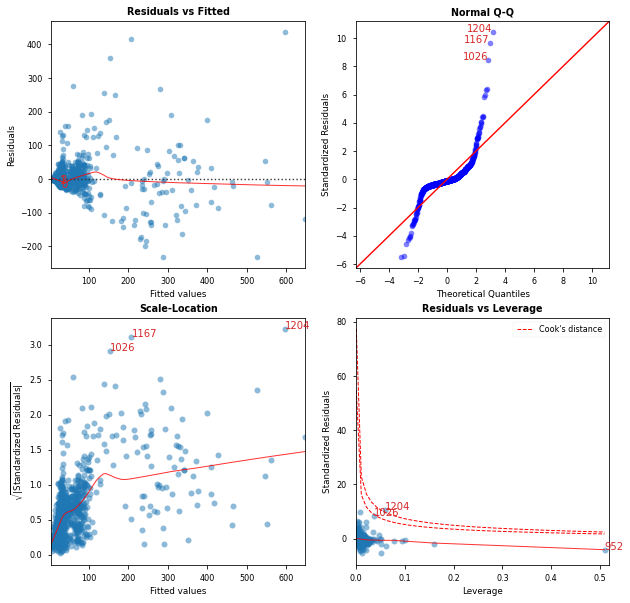

               Features  VIF Factor
4           Private_Yes        1.10
1          Category_Art        1.13
3      Category_Utility        1.14
5            Volume_USD        1.55
0          Log Variance        1.92
2  Category_Collectible        2.11


In [97]:
cls = Linear_Reg_Diagnostic(modelOnlyDay2)
fig, ax = cls()

In [98]:
ypred = modelOnlyDay2.predict(XfOnlyDay)

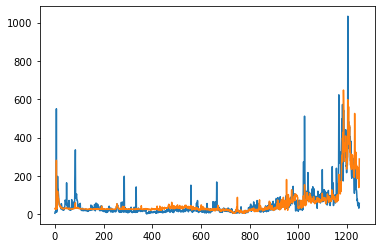

In [99]:
fig, ax = plt.subplots()
ax.plot(YOnlyday, label="Data")
ax.plot(ypred, label="Data")
plt.show()

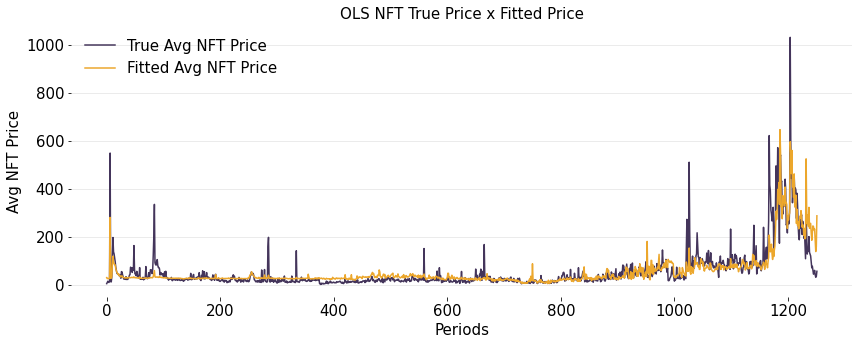

In [106]:
plt.figure(figsize=(14, 5)) #width and height 
plt.plot(YOnlyday,label='True Avg NFT Price',color='#44355B' ); # add lable
plt.plot(ypred, label='Fitted Avg NFT Price', color='#ECA72C'); # use hex number for the color 
for pos in ['right', 'top', 'bottom', 'left']:
   plt.gca().spines[pos].set_visible(False)
plt.title('OLS NFT True Price x Fitted Price',fontsize=15)
plt.xlabel('Periods',fontsize=15)
plt.ylabel('Avg NFT Price',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(frameon=False,fontsize=15); # dispaly legend 
plt.grid (axis='y', alpha=0.3) # you can add gridline  and alpha to increase transparency 